<a href="https://colab.research.google.com/github/CarineMS/Airbnb_Madrid/blob/main/Airbnb_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Portifólio Data Science**

by [Carine Soares](https://www.linkedin.com/in/carinemsoares/)

---

<h1>Análise dos Dados do Airbnb - Madrid</h1>

Imagine uma empresa hoteleira que não possui nenhum hotel? Sim, essa é a realidade da **maior empresa hoteleira da atualidade**: O [Airbnb](https://www.airbnb.com.br/).

A sigla Airbnb significa Air Bed & Breakfast que explica a ideia inicial dessa Startup, que se trata de hospedar em casa viajantes (*em colchões infláveis*). 

A ideia inovadora revolucionou o mercado de hotelaria, conectou viajantes com anfitrões que querem alugar seus imóveis através de uma platadorma dinâmica oferecida pelo Airbnb.

Em 2021, a Startup fundada 15 anos atrás, já estava oferecendo hospedagens alternativas no Brasil e em mais de 190 países.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="100%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<sub>*Neste **notebook**, iremos analisar os dados referentes à cidade de Madrid, Espanha, e ver quais insights podem ser extraídos a partir de dados brutos.*</sub>

## Obtenção dos Dados

A fonte de dados usada para esse projeto foi o site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). 

Ao localizar os conjuntos de dados disponibilizados da cidade de Madrid escolheu-se o arquivo `listings.csv` que contém as informações resumidas e metricas para anúncios, indicadas para criar boas visualizções.

É importante mencionar que o site está em constante atualização tornando-se possível que o conjunto de dados exato utilizado neste notebook não esteja mais disponível.

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2021-12-08/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número identificador do imóvel
* `name` -  nome do imóvel anunciado
* `host_id` - número identificador do anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - nome do grupo em que o bairro pertence
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel 
* `room_type` - categoria do quarto oferecido 
* `price` - preço do imóvel 
* `minimum_nights` - número mínimo de noites
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação 
* `reviews_per_month` - porcentagem de avaliações por mês
* `calculates_host_listings_count` - número de imóveis do mesmo anfitrião 
* `availability_365` - disponibilidade ao longo do ano
* `number_of_reviews_ltm` - número de avaliações nos últimos doze meses
* `license` - coluna com valor inválido


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas e as informações estatísticas gerais.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,59,1,81,2021-11-20,0.57,1,149,3,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.38,2,131,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,6,311,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,14,2021-11-29,0.16,1,167,4,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,29,2,154,2021-11-28,1.09,1,344,5,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,17831.0,3.164435e+07,1.519928e+07,6369.000000,1.947884e+07,3.448713e+07,4.441193e+07,5.372922e+07
host_id,17831.0,1.386539e+08,1.293288e+08,7952.000000,2.652194e+07,9.901898e+07,2.317749e+08,4.350623e+08
latitude,17831.0,4.042100e+01,2.241219e-02,40.316761,4.040954e+01,4.041962e+01,4.042994e+01,4.053623e+01
longitude,17831.0,-3.694158e+00,2.817123e-02,-3.836250,-3.707620e+00,-3.701180e+00,-3.686350e+00,-3.544844e+00
price,17831.0,1.353471e+02,3.821846e+02,0.000000,4.000000e+01,7.200000e+01,1.170000e+02,1.596000e+04
minimum_nights,17831.0,7.430038e+00,3.663926e+01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.125000e+03
number_of_reviews,17831.0,3.611026e+01,6.887503e+01,0.000000,1.000000e+00,7.000000e+00,3.800000e+01,7.670000e+02
reviews_per_month,13677.0,1.344457e+00,1.572943e+00,0.010000,2.300000e-01,8.100000e-01,1.940000e+00,2.500000e+01
calculated_host_listings_count,17831.0,1.157832e+01,2.771068e+01,1.000000,1.000000e+00,2.000000e+00,7.000000e+00,1.990000e+02
availability_365,17831.0,1.482445e+02,1.398480e+02,0.000000,0.000000e+00,1.040000e+02,3.080000e+02,3.650000e+02


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 	 17831
Variáveis: 	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A eficiência de um conjunto de dados está diretamente relacionada a quantidade de valores ausentes.

* É possível ver que a coluna `license` possui 85.07% dos seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em aproximadamente 1/4 das linhas.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

license                           85.070944
reviews_per_month                 23.296506
last_review                       23.296506
host_name                          0.044866
name                               0.016825
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

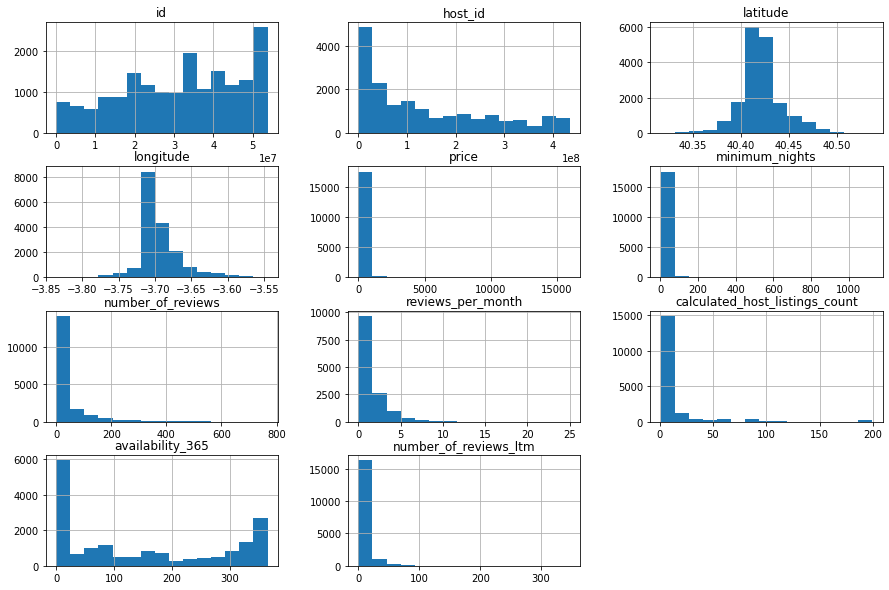

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Verifica-se que as variáveis `price`, `minimum_nights` e `calculated_host_listings_count` apresentam distribuições do tipo despenhadeiro, com concentração dos valores à esquerda.

Os histogramas com distribuição não Gaussiana pode estar associado a *outliers*.

Por esse motivo se faz necessário verificar se há a presença desses valores para essas variáveis.

### **Q4. Há *outliers* presentes?** 

In [ ]:
# consultar o resumo estatístivo das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,17831.0,135.347148,382.184647,0.00,40.00,72.00,117.00,15960.0
minimum_nights,17831.0,7.430038,36.639258,1.00,1.00,2.00,3.00,1125.0
number_of_reviews,17831.0,36.110257,68.875025,0.00,1.00,7.00,38.00,767.0
reviews_per_month,13677.0,1.344457,1.572943,0.01,0.23,0.81,1.94,25.0
calculated_host_listings_count,17831.0,11.578319,27.710678,1.00,1.00,2.00,7.00,199.0
availability_365,17831.0,148.244462,139.847972,0.00,0.00,104.00,308.00,365.0


Considerando as informações estatísticas, podemos considerar as seguintes hipóteses:

* A variável `price` tem 75% do valor abaixo de 117.00 porém seu valor máximo é 15596.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* O 3º quartil da variável `calculated_host_listings_count` equivale a 7 entretanto o seu valor máximo é 199.

#### Boxplot para `price`

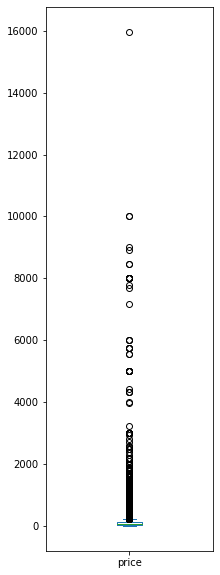


price: valores acima de 600 
487 entradas
2.7312%


In [ ]:
# price
df.price.plot(kind='box', vert=True, figsize=(3,10),)
plt.show()

# quantidade de valores acima de 600 para price
print("\nprice: valores acima de 600 ")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

#### Boxplot para `minimum_nights`


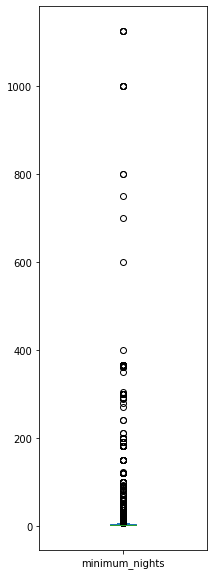


minimum_nights: valores acima de 20 
1154 entradas
6.4719%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=True, figsize=(3,10),)
plt.show()

# quantidade de valores acima de 20 dias para minimum_nights
print("\nminimum_nights: valores acima de 20 ")
print("{} entradas".format(len(df[df.minimum_nights > 20])))
print("{:.4f}%".format((len(df[df.minimum_nights > 20]) / df.shape[0])*100))

#### Boxplot para `calculated_host_listings_count`

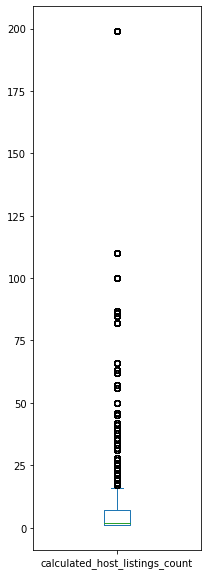


calculated_host_listings_count: valores acima de 60 
1022 entradas
5.7316%


In [ ]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=True, figsize=(3,10),)
plt.show()

# quantidade de valores acima de 60 hospedagens para calculated_host_listings_count
print("\ncalculated_host_listings_count: valores acima de 60 ")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 60])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 60]) / df.shape[0])*100))

#### Histogramas sem *outliers*


Sabe-se que a presença de *outliers* afetam drasticamente os resultados dos histogramas trazendo insights erroneos, desta forma, uma maneira de tornar a informação extraída mais segura é eliminar os *outliers* e reavaliar os novos hitogramas.

Para a variável `price` consideraremos os valores inferiores a 600, para `minimum_nights` os valores inferiores a 20 permanecem e para `calculated_host_listings_count` os valores até 60 serão considerados.

Desta forma, com os *outliers* eliminados, um novo DataFrame é utilizado e consequentemente um novo histograma será analisado.

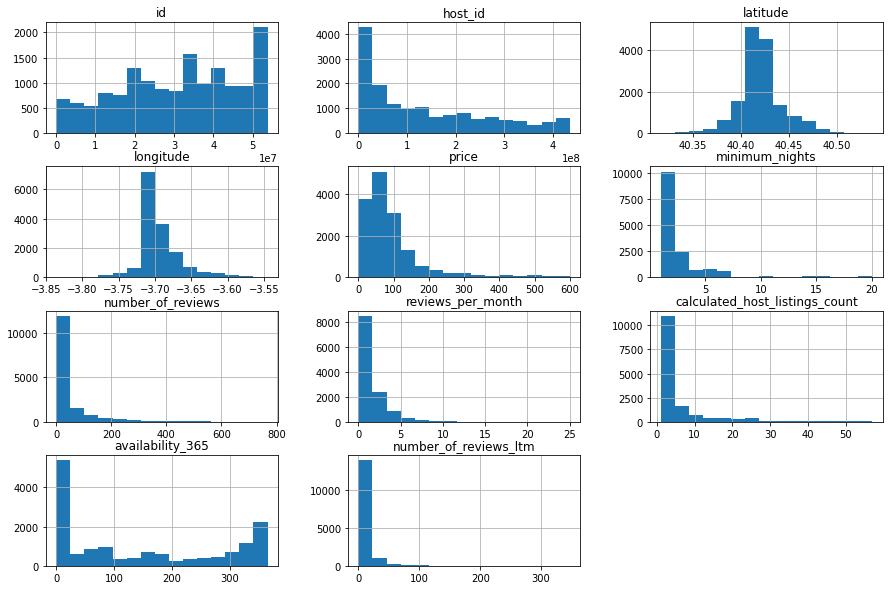

In [ ]:
# remover *outliers* em um novo Dataframe
df_cleaned = df.copy()
df_cleaned.drop(df_cleaned[df_cleaned.price > 600].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.minimum_nights > 20].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.calculated_host_listings_count
 > 60].index, axis=0, inplace=True)

# remover a coluna `license`, pois está com valor inváldo
df_cleaned.drop('license', axis=1, inplace=True)

# plotar o histograma com as considerações descritas
df_cleaned.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

A correlação apresenta se existe uma relação entre duas variáveis e qual o seu nível.

Para o nosso dataframe a única correlação presente é com o número de avaliações `number_of_reviews` com o número de avaliações por mês `reviews_per_month`.

In [ ]:
# criar uma matriz de correlação
corr = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.082830,-0.074952,-0.045000,0.036539,0.153120
minimum_nights,-0.082830,1.000000,-0.064770,-0.159457,0.020254,-0.046534
number_of_reviews,-0.074952,-0.064770,1.000000,0.604401,0.045496,0.077451
reviews_per_month,-0.045000,-0.159457,0.604401,1.000000,0.060819,0.176413
calculated_host_listings_count,0.036539,0.020254,0.045496,0.060819,1.000000,0.169171
availability_365,0.153120,-0.046534,0.077451,0.176413,0.169171,1.000000


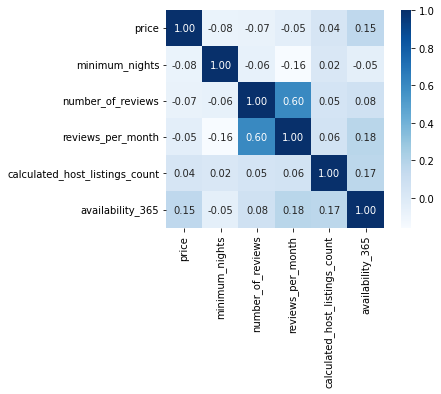

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual é o valor médio de cada tipo de imóvel no Airbnb?**

Alugar um quarto de hotel é em média 30% mais caro do que alugar uma casa ou um apartamento inteiro em Madrid. 


In [ ]:
# ver a média da coluna `price`
df_cleaned.groupby(['room_type']).price.mean().sort_values(ascending=False)

room_type
Hotel room         164.986486
Entire home/apt    112.770138
Private room        65.695821
Shared room         60.768182
Name: price, dtype: float64

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

O fato de alugar a casa/apartamento inteiro ser mais barato do que um quarto de hotel, esse se torna a opção mais atraente ao hospede e por isso com mais possibilidades por toda a Madrid.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_cleaned.room_type.value_counts()

Entire home/apt    8567
Private room       5811
Shared room         220
Hotel room          148
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_cleaned.room_type.value_counts() / df_cleaned.shape[0])*100

Entire home/apt    58.097111
Private room       39.407297
Shared room         1.491930
Hotel room          1.003662
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Madrid?**

As os bairros mais caros de Madrid são `El Pardo` e `Rosas`, para verificar essa informação optou-se por visualizar quantos imóveis estão disponíveis nessas localidades e se a média representa bem esse cenário.

In [ ]:
# ver preços por bairros, na média
df_cleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
El Pardo            274.500000
Rosas               197.039216
Recoletos           166.250000
Canillejas          164.161765
Hellín              154.480000
Marroquina          149.095238
Simancas            143.197802
El Viso             141.107143
Ambroz              139.000000
Apostol Santiago    138.357143
Name: price, dtype: float64

Para verificar se a média dos preços dos bairros El Pardo e Rosas são condizentes com a quantidade de imóveis obtou-se por analizar o formato do conjunto de dados desses bairros.

O bairro mais caro de Madrid, `El Pardo` tem informações de apenas dois imóveis. Já o bairro `Rosas` tem 51 imóveis disponiveis para locação.

In [ ]:
# quantidade de imóveis no El Pardo
print(df_cleaned[df_cleaned.neighbourhood == "El Pardo"].shape)

# quantidade de imóveis Rosas
print(df_cleaned[df_cleaned.neighbourhood == "Rosas"].shape)


(2, 17)
(51, 17)


Verificando os valores dos dois imóveis presentes no bairro `El Pardo` fica claro que um dos imóveis tem o valor 10 vezes mais caro do que o outro. Podemos afirmar então que o bairro mais caro de Madrid em média é o bairro `Rosas`. 

In [ ]:
# informações dos imóveis no El Pardo
df_cleaned[df_cleaned.neighbourhood == "El Pardo"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
4163,19097817,Bohardilla privada con encanto,68821735,Salonica,Fuencarral - El Pardo,El Pardo,40.52014,-3.77448,Private room,49,1,24,2021-10-10,0.44,1,90,1
9979,35195487,Apartamento Acogedor,105619327,Lorena,Fuencarral - El Pardo,El Pardo,40.51950,-3.77850,Entire home/apt,500,2,0,NaN,NaN,1,0,0


É possível relacionar os imóveis com as informações geográficas de `x=longitude` e `y=latitude` e plotar cada ponto.

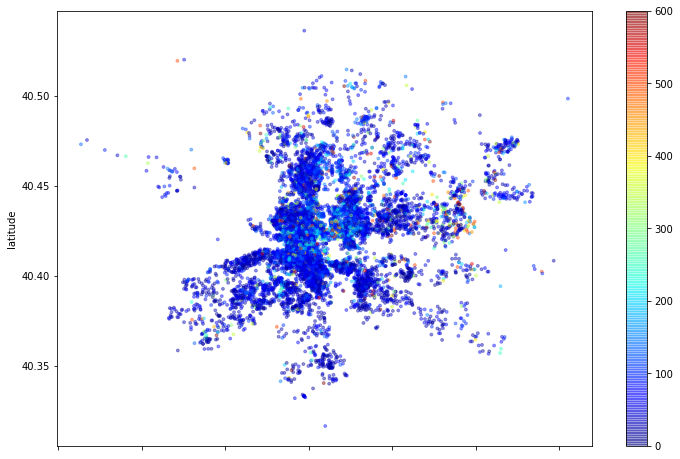

In [ ]:
# plotar os imóveis pela latitude-longitude
df_cleaned.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_cleaned['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Para cerca de 15.3 mil registros a média de noites mínimas requeridas pelos locatários são de aproximadamente 3 noites.

In [ ]:
df_cleaned.minimum_nights.shape[0]

15267

In [ ]:
# ver a média da coluna `minimum_nights``
df_cleaned.minimum_nights.mean()

2.674148921741489

## Conclusões


Este é um *dataset* onde os valores ausentes se concentram parcialmente em uma variável especifica que para nossa análise não é essencial. 

Existem variáveis com *outliers*. Foram escolhidas apenas 3 variáveis dentre 18 para serem corrigidas. A correção se baseou em eliminar informações acima de um limiar especificado. É necessário deixar claro que a limpeza das demais 15 variáveis podem significar melhores *insights*.

O *dataset* utilizado já é um resumo disponibilizado pelo Airbnb, isso implica que a análise pode ter se tornado generalista. E além disso, recomenda-se para uma análise completa e mais profunda que utilize-se o conjunto completo que contém 74 atributos disponíveis.